In [1]:
import pandas as pd
import numpy as np
import csv
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from collections import defaultdict
from sklearn import model_selection, svm, naive_bayes, metrics
from sklearn.ensemble import RandomForestClassifier
import string
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, accuracy_score, f1_score, confusion_matrix, recall_score
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

# Read the labels and the data
labels = pd.read_csv('train-balanced-sarcasm.csv', dtype=int, usecols= ['label'], nrows = 100000)  
sarcasm_data = pd.read_csv('train-balanced-sarcasm.csv', dtype= str, usecols = ['comment'], nrows = 100000)

sarcasm_data = pd.DataFrame(sarcasm_data)
sarcasm_data['comment'].dropna(inplace=True)
sarcasm_data['comment'] = sarcasm_data['comment'].astype(str)

# make all comments lowercase
sarcasm_data['comment'] = sarcasm_data['comment'].str.lower()

# remove punctuations
def remove_punctuations(text):
    for char in string.punctuation:
        text = text.replace(char, '')
    return text
sarcasm_data['comment'] = sarcasm_data['comment'].apply(remove_punctuations)
# tokenization
sarcasm_data['comment'] = sarcasm_data['comment'].apply(word_tokenize)

# tag adjectives, verbs and adverbs for lemmatization
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ 
tag_map['V'] = wn.VERB 
tag_map['R'] = wn.ADV 

for i in range(sarcasm_data.shape[0]):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(sarcasm_data['comment'].iloc[i]):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    sarcasm_data.loc[i,'final'] = str(Final_words)
    
print("Finished preprocessing")
print(sarcasm_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\selen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Finished preprocessing
                                                 comment  \
0                                          [nc, and, nh]   
1      [you, do, know, west, teams, play, against, we...   
2      [they, were, underdogs, earlier, today, but, s...   
3      [this, meme, isnt, funny, none, of, the, new, ...   
4                 [i, could, use, one, of, those, tools]   
...                                                  ...   
99995                                      [so, jealous]   
99996  [yeah, we, all, know, it, is, the, baby, boome...   
99997                         [story, setting, artstyle]   
99998  [ebola, virus, to, papyrus, to, the, german, i...   
99999                       [ford, is, just, that, good]   

                                                   final  
0                                           ['nc', 'nh']  
1      ['know', 'west', 'team', 'play', 'west', 'team...  
2      ['underdog', 'earlier', 'today', 'since', 'gro...  
3      ['meme', 'isn

In [2]:
# Split the data into validation, test, training
Train_X, Data_X, Train_Y, Data_Y = model_selection.train_test_split(sarcasm_data['final'], labels, test_size=0.3)
Test_X, Val_X, Test_Y, Val_Y = model_selection.train_test_split(Data_X,Data_Y,test_size=1/3)
# Encode the labels 
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Val_Y = Encoder.fit_transform(Val_Y)
# Vectorize the text data
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(sarcasm_data['final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Val_X_Tfidf = Tfidf_vect.transform(Val_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
print(Tfidf_vect.vocabulary_)

c:\Users\selen\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


{'nc': 2917, 'know': 2426, 'west': 4850, 'team': 4399, 'play': 3287, 'east': 1385, 'right': 3739, 'earlier': 1378, 'today': 4520, 'since': 4030, 'announcement': 180, 'afternoon': 83, 'vega': 4740, 'line': 2538, 'move': 2859, 'meme': 2725, 'isnt': 2315, 'funny': 1801, 'none': 2975, 'new': 2946, 'york': 4985, 'nigga': 2961, 'one': 3062, 'could': 993, 'use': 4715, 'tool': 4536, 'dont': 1302, 'pay': 3184, 'attention': 279, 'long': 2574, 'shes': 3969, 'legal': 2494, 'wouldnt': 4942, 'kick': 2404, 'bed': 397, 'take': 4373, 'load': 2557, 'trick': 4593, 'general': 1833, 'weird': 4843, 'blade': 453, 'gtfo': 1941, 'good': 1888, 'build': 580, 'buy': 609, 'game': 1809, 'save': 3843, 'would': 4940, 'love': 2590, 'see': 3900, 'think': 4465, 'significant': 4018, 'amount': 154, 'spend': 4166, 'tax': 4388, 'dollar': 1290, 'people': 3205, 'damn': 1098, 'hop': 2105, 'god': 1880, 'real': 3568, 'agenda': 87, 'great': 1924, 'idea': 2153, 'ayy': 319, 'bb': 381, 'make': 2636, 'bit': 446, 'sense': 3921, 'conte

SVM Accuracy Score ->  66.545
Precision ->  0.6545518701482004
Recall ->  0.4394172687433377
F1 Score ->  0.5258309120544256
Confusion Matrix for SVM:


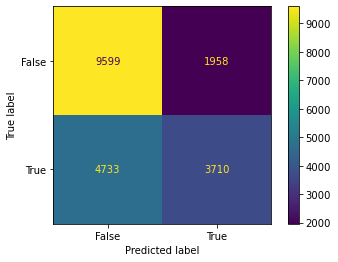

In [3]:
# SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma=2)
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Find the accuracy score
print("SVM Accuracy Score -> ", accuracy_score(predictions_SVM, Test_Y)*100)
print("Precision -> ", precision_score(Test_Y, predictions_SVM, average="binary"))
print("Recall -> ", recall_score(Test_Y, predictions_SVM, average="binary"))
print("F1 Score -> ", f1_score(Test_Y, predictions_SVM, average="binary"))
print("Confusion Matrix for SVM:")
conf_matrix=confusion_matrix(Test_Y, predictions_SVM, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

RFC Accuracy Score -> 66.025
Precision ->  0.6259168704156479
Recall ->  0.48513561530261756
F1 Score ->  0.5466070594515247
Confusion Matrix for RFC:


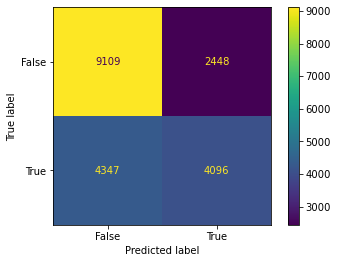

In [4]:
# Random Forest
RFC = RandomForestClassifier()
# fit the training dataset on the classifier
RFC.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation set
predictions_RFC = RFC.predict(Test_X_Tfidf)
# Calc. accuracy
print("RFC Accuracy Score ->", accuracy_score(predictions_RFC, Test_Y)*100)
print("Precision -> ", precision_score(Test_Y, predictions_RFC, average="binary"))
print("Recall -> ", recall_score(Test_Y, predictions_RFC, average="binary"))
print("F1 Score -> ", f1_score(Test_Y, predictions_RFC, average="binary"))
print("Confusion Matrix for RFC:")
conf_matrix= confusion_matrix(Test_Y, predictions_RFC, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

NAIVE BAYES Accuracy Score -> 66.18
Precision ->  0.6660075143365631
Recall ->  0.3989103399265664
F1 Score ->  0.498962962962963
Confusion Matrix for RFC:


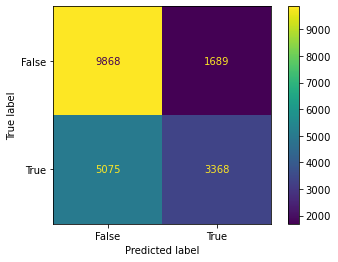

In [5]:
#Naive Bayes 
NAIVE_BAYES = naive_bayes.MultinomialNB()
# fit the training dataset on the classifier
NAIVE_BAYES.fit(Train_X_Tfidf, Train_Y)
# predict the labels on validation set
predictions_NAIVE_BAYES = NAIVE_BAYES.predict(Test_X_Tfidf)
# Calc. accuracy
print("NAIVE BAYES Accuracy Score ->", accuracy_score(predictions_NAIVE_BAYES, Test_Y)*100)
print("Precision -> ", precision_score(Test_Y, predictions_NAIVE_BAYES, average="binary"))
print("Recall -> ", recall_score(Test_Y, predictions_NAIVE_BAYES, average="binary"))
print("F1 Score -> ", f1_score(Test_Y, predictions_NAIVE_BAYES, average="binary"))
print("Confusion Matrix for RFC:")
conf_matrix=confusion_matrix(Test_Y, predictions_NAIVE_BAYES, labels=[0,1])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()